## **PARTE A) Relembrando os dados originais**

### **A.1) Importando dados**

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd

In [120]:
data = pd.read_csv("infringement_dataset.csv")

In [5]:
data.columns

Index(['loan_id', 'infringed', 'contract_type', 'gender', 'has_own_car',
       'has_own_realty', 'num_children', 'annual_income', 'credit_amount',
       'credit_annuity', 'goods_valuation', 'income_type', 'education',
       'family_status', 'housing_type', 'age', 'days_employed', 'car_age',
       'provided_mobilephone', 'provided_workphone', 'provided_homephone',
       'mobilephone_reachable', 'provided_email', 'occupation_type',
       'num_family_members', 'region_rating', 'organization_type',
       'score_ext_1', 'score_ext_2', 'score_ext_3', 'appendix_a', 'appendix_b',
       'appendix_c', 'appendix_d', 'appendix_e', 'appendix_f', 'appendix_g',
       'appendix_h', 'appendix_i', 'appendix_j', 'appendix_k', 'appendix_l',
       'appendix_m', 'appendix_n', 'appendix_o', 'appendix_p', 'appendix_q',
       'appendix_r', 'appendix_s', 'appendix_t', 'num_req_bureau_hour',
       'num_req_bureau_day', 'num_req_bureau_week', 'num_req_bureau_month',
       'num_req_bureau_qrt', 'num_r

In [243]:
# Selecionando colunas de interesse
data1 = data[['loan_id','infringed','num_children','annual_income','credit_amount','credit_annuity','goods_valuation',
               'age','days_employed','car_age','provided_mobilephone','provided_workphone','provided_homephone',
               'mobilephone_reachable','provided_email','num_family_members','avg_days_decision','past_avg_amount_annuity',
               'past_avg_amt_application','past_avg_amt_credit','past_loans_approved','past_loans_refused',
               'past_loans_canceled','past_loans_unused','past_loans_total']]

In [246]:
# Checando se há valores nulos
data1.isna().sum()

loan_id                          0
infringed                        0
num_children                     0
annual_income                    0
credit_amount                    0
credit_annuity                  12
goods_valuation                278
age                              0
days_employed                    0
car_age                     202929
provided_mobilephone             0
provided_workphone               0
provided_homephone               0
mobilephone_reachable            0
provided_email                   0
num_family_members               2
avg_days_decision            16454
past_avg_amount_annuity      16871
past_avg_amt_application     16454
past_avg_amt_credit          16454
past_loans_approved          16454
past_loans_refused           16454
past_loans_canceled          16454
past_loans_unused            16454
past_loans_total             16454
dtype: int64

#### A variável 'car_age' tem 202K valores nulos (65% do universo de dados): é uma má ideia eliminar todas as linhas com esse valor nulo. Como é uma variável de pouca relevância, podemos retirá-la sem prejuízo à análise de dados.

In [248]:
# Selecionando colunas de interesse
data1 = data1[['loan_id','infringed','num_children','annual_income','credit_amount','credit_annuity','goods_valuation',
               'age','days_employed','provided_mobilephone','provided_workphone','provided_homephone',
               'mobilephone_reachable','provided_email','num_family_members','avg_days_decision','past_avg_amount_annuity',
               'past_avg_amt_application','past_avg_amt_credit','past_loans_approved','past_loans_refused',
               'past_loans_canceled','past_loans_unused','past_loans_total']]

In [249]:
max(data1.isna().sum())

16871

In [250]:
# Checando % de linhas com valores nulos
print(f"{round(max(data1.isna().sum())/len(data1)*100,2)}%")

5.49%


#### Eliminar valores nulos afeta apenas 5% das observações, o que é excelente, pois está dentro da margem de erro.

In [251]:
# Deletando os valores nulos
data2 = data1.dropna()

In [252]:
# Criando variáveis de porcentagem, para padronizar o peso delas
data2['perc_approved'] = data2.past_loans_approved / data2.past_loans_total
data2['perc_refused'] = data2.past_loans_refused / data2.past_loans_total
data2['perc_canceled'] = data2.past_loans_canceled / data2.past_loans_total
data2['perc_unused'] = data2.past_loans_unused / data2.past_loans_total

In [253]:
# Criando novo dataset, com as variáveis de interesse após as transformações
data3 = data2[['loan_id','infringed','num_children','annual_income','credit_amount','credit_annuity','goods_valuation',
               'age','days_employed','provided_mobilephone','provided_workphone','provided_homephone',
               'mobilephone_reachable','provided_email','num_family_members','avg_days_decision','past_avg_amount_annuity',
               'past_avg_amt_application','past_avg_amt_credit','perc_approved','perc_refused','perc_canceled','perc_unused']]

In [254]:
data3.head()

,loan_id,infringed,num_children,annual_income,credit_amount,credit_annuity,goods_valuation,age,days_employed,provided_mobilephone,...,provided_email,num_family_members,avg_days_decision,past_avg_amount_annuity,past_avg_amt_application,past_avg_amt_credit,perc_approved,perc_refused,perc_canceled,perc_unused
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,25,-637,1,...,0,1.0,606.000000,9251.775,179055.00,179055.00,1.000000,0.000000,0.000000,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,45,-1188,1,...,0,2.0,1305.000000,56553.990,435436.50,484191.00,1.000000,0.000000,0.000000,0.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,52,-225,1,...,0,1.0,815.000000,5357.250,24282.00,20106.00,1.000000,0.000000,0.000000,0.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,52,-3039,1,...,0,2.0,272.444444,23651.175,272203.26,291695.50,0.555556,0.333333,0.111111,0.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,54,-3038,1,...,0,1.0,1222.833333,12278.805,150530.25,166638.75,1.000000,0.000000,0.000000,0.0


### **A.2) Análise de dados (variáveis quantitativas)**

### Análise de correlação

In [143]:
import matplotlib.pyplot as plt
import seaborn as sb 
import numpy as np

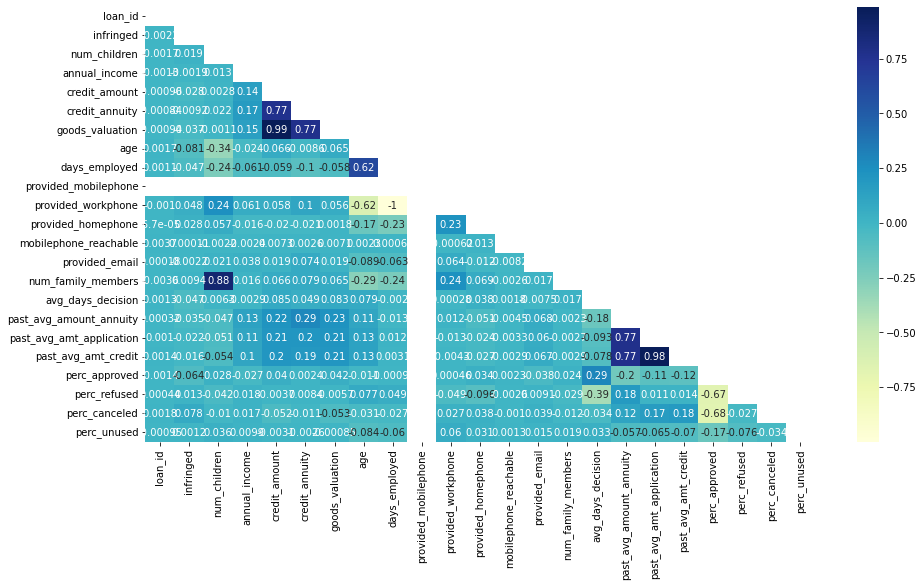

In [261]:
# Correlation map
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(data3.corr())) #not to bring mirror results
dataplot = sb.heatmap(data3.corr(), cmap="YlGnBu", annot=True, mask=mask) #creating plot
plt.show() 

#### A segunda coluna mostra a variável "infringed" e todas as correlações com as demais variáveis: a maior delas com "idade" (8,1%), enquanto que as demais estão abaixo disso e próximo de zero.

In [256]:
# Números gerais das correlações acima
lista=[]
for i in data3.corr().mean():
    lista.append(i)
print(f'Média "infringed": { round(lista[1]*100,2)}%')
print(f'Média geral: {round(data3.corr().mean().mean()*100,2)}%')
print(f'Desvpad geral: {round(data3.corr().mean().std()*100,2)}%')

Média "infringed": 3.65%
Média geral: 6.94%
Desvpad geral: 6.41%


### Análise de regressão linear múltipla

In [239]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [257]:
# Vetores X e Y
X = data3[['num_children','annual_income','credit_amount','credit_annuity','goods_valuation',
            'age','days_employed','provided_mobilephone','provided_workphone','provided_homephone',
            'mobilephone_reachable','provided_email','num_family_members','avg_days_decision','past_avg_amount_annuity',
            'past_avg_amt_application','past_avg_amt_credit','perc_approved','perc_refused','perc_canceled','perc_unused']]
y = data3['infringed']

In [258]:
# Objeto regressor
reg = LinearRegression()
reg.fit(X, y)

# Intercepto e constantes
cte = sm.add_constant(X)
est = sm.OLS(y, cte)
est2 = est.fit()

# Resultados
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              infringed   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     340.8
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:50:08   Log-Likelihood:                -33237.
No. Observations:              290361   AIC:                         6.651e+04
Df Residuals:                  290341   BIC:                         6.673e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
num_children            

#### A regressão trouxe variáveis estatisticamente relavantes (|t| > 2.5), mas com pouco impacto sobre "infringed", como se pode notar no tamanho dos coeficientes.
#### As variáveis que mais impactam são:
- provided_workphone: se =1, rises risk on 100,28%
- provided_mobilephone: se =1, lows risk on 63,76%
- perc_unused: uma nova parcela unsed, baixa o risco em 19,88%
- perc_approved: uma nova parcela aprovada, baixa o risco em 19,42%

### **A.3) Análise de dados (variáveis qualitativas)**

In [290]:
data.columns

Index(['loan_id', 'infringed', 'contract_type', 'gender', 'has_own_car',
       'has_own_realty', 'num_children', 'annual_income', 'credit_amount',
       'credit_annuity', 'goods_valuation', 'income_type', 'education',
       'family_status', 'housing_type', 'age', 'days_employed', 'car_age',
       'provided_mobilephone', 'provided_workphone', 'provided_homephone',
       'mobilephone_reachable', 'provided_email', 'occupation_type',
       'num_family_members', 'region_rating', 'organization_type',
       'score_ext_1', 'score_ext_2', 'score_ext_3', 'appendix_a', 'appendix_b',
       'appendix_c', 'appendix_d', 'appendix_e', 'appendix_f', 'appendix_g',
       'appendix_h', 'appendix_i', 'appendix_j', 'appendix_k', 'appendix_l',
       'appendix_m', 'appendix_n', 'appendix_o', 'appendix_p', 'appendix_q',
       'appendix_r', 'appendix_s', 'appendix_t', 'num_req_bureau_hour',
       'num_req_bureau_day', 'num_req_bureau_week', 'num_req_bureau_month',
       'num_req_bureau_qrt', 'num_r

In [264]:
# Criando pequenas tabelas dinâmicas, uma para cada variável
data6=data[['gender','infringed']]
data6['group']='gender'
multi6 = data6.set_index(['group', 'gender'])

data7=data[['has_own_car','infringed']]
data7['group']='has_own_car'
multi7 = data7.set_index(['group', 'has_own_car'])

data8=data[['has_own_realty','infringed']]
data8['group']='has_own_realty'
multi8 = data8.set_index(['group', 'has_own_realty'])

data9=data[['contract_type','infringed']]
data9['group']='contract_type'
multi9 = data9.set_index(['group', 'contract_type'])

data10=data[['income_type','infringed']]
data10['group']='income_type'
multi10 = data10.set_index(['group', 'income_type'])

data11=data[['education','infringed']]
data11['group']='education'
multi11 = data11.set_index(['group', 'education'])

data12=data[['family_status','infringed']]
data12['group']='family_status'
multi12 = data12.set_index(['group', 'family_status'])

data13=data[['housing_type','infringed']]
data13['group']='housing_type'
multi13 = data13.set_index(['group', 'housing_type'])

data14=data[['occupation_type','infringed']]
data14['group']='occupation_type'
multi14 = data14.set_index(['group', 'occupation_type'])

data15=data[['organization_type','infringed']]
data15['group']='organization_type'
multi15 = data15.set_index(['group', 'organization_type'])

### Participação percentual de cada valor de cada variável sobre "infringed"

In [266]:
# Criando subtópico (sob a forma de índice) para juntar todas as análises em uma única tabela
data6_1=(data6.groupby(['group','gender']).sum()/data6.groupby(['group','gender']).count())
data6_1.sort_values(by='infringed', ascending = False)

data7_1=(data7.groupby(['group','has_own_car']).sum()/data7.groupby(['group','has_own_car']).count())
data7_1.sort_values(by='infringed', ascending = False)

data8_1=(data8.groupby(['group','has_own_realty']).sum()/data8.groupby(['group','has_own_realty']).count())
data8_1.sort_values(by='infringed', ascending = False)

data9_1=(data9.groupby(['group','contract_type']).sum()/data9.groupby(['group','contract_type']).count())
data9_1.sort_values(by='infringed', ascending = False)

data10_1=data10.groupby(['group','income_type']).sum()/data10.groupby(['group','income_type']).count()
data10_1.sort_values(by='infringed', ascending = False)

data11_1=data11.groupby(['group','education']).sum()/data11.groupby(['group','education']).count()
data11_1.sort_values(by='infringed', ascending = False)

data12_1=multi.groupby(['group','family_status']).sum()/multi.groupby(['group','family_status']).count()
data12_1.sort_values(by='infringed', ascending = False)

data13_1=data13.groupby(['group','housing_type']).sum()/data13.groupby(['group','housing_type']).count()
data13_1.sort_values(by='infringed', ascending = False)

data14_1=data14.groupby(['group','occupation_type']).sum()/data14.groupby(['group','occupation_type']).count()
data14_1.sort_values(by='infringed', ascending = False)

data15_1=data15.groupby(['group','organization_type']).sum()/data15.groupby(['group','organization_type']).count()
data15_1.sort_values(by='infringed', ascending = False)

ind = data15[data15['organization_type'].str.contains('Industry', na = False)]
trd = data15[data15['organization_type'].str.contains('Trade', na = False)]
bus = data15[data15['organization_type'].str.contains('Business Entity', na = False)]

ind['organization_type'] = 'Industry'
trd['organization_type'] = 'Trade'
bus['organization_type'] = 'Business Ent'

ind_1 = ind.groupby(['group','organization_type']).sum()/ind.groupby(['group','organization_type']).count()
ind_1.sort_values(by='infringed', ascending = False)

trd_1 = trd.groupby(['group','organization_type']).sum()/trd.groupby(['group','organization_type']).count()
trd_1.sort_values(by='infringed', ascending = False)

bus_1 = bus.groupby(['group','organization_type']).sum()/bus.groupby(['group','organization_type']).count()
bus_1.sort_values(by='infringed', ascending = False)

xxx = pd.concat([data6_1,data7_1,data8_1,data9_1,data10_1,data11_1,data12_1,data13_1,data14_1,ind_1,bus_1,trd_1])
xxx.sort_values(by=['group','infringed'], ascending = False)

infringed
group             gender                                  
organization_type Business Ent                    0.091211
                  Trade                           0.090744
                  Industry                        0.086018
occupation_type   Low-skill Laborers              0.171524
                  Drivers                         0.113261
                  Waiters/barmen staff            0.112760
                  Security staff                  0.107424
                  Laborers                        0.105788
                  Cooking staff                   0.104440
                  Sales staff                     0.096318
                  Cleaning staff                  0.096067
                  Realty agents                   0.078562
                  Secretaries                     0.070498
                  Medicine staff                  0.067002
                  Private service staff           0.065988
                  IT staff                        0.064639
                  HR staff                        0.063943
                  Core staff                      0.063040
                  Managers                        0.062140
                  High skill tech staff           0.061599
                  Accountants                     0.048303
income_type       Maternity leave                 0.400000
                  Unemployed                      0.363636
                  Working                         0.095885
                  Commercial associate            0.074843
                  State servant                   0.057550
                  Pensioner                       0.053864
                  Businessman                     0.000000
                  Student                         0.000000
housing_type      Rented apartment                0.123131
                  With parents                    0.116981
                  Municipal apartment             0.085397
                  Co-op apartment                 0.079323
                  House / apartment               0.077957
                  Office apartment                0.065724
has_own_realty    N                               0.083249
                  Y                               0.079616
has_own_car       N                               0.085002
                  Y                               0.072437
gender            M                               0.101419
                  F                               0.069993
                  XNA                             0.000000
family_status     Civil marriage                  0.099446
                  Single / not married            0.098077
                  Separated                       0.081942
                  Married                         0.075599
                  Widow                           0.058242
                  Unknown                         0.000000
education         Lower secondary                 0.109277
                  Secondary / secondary special   0.089399
                  Incomplete higher               0.084850
                  Higher education                0.053551
                  Academic degree                 0.018293
contract_type     Cash loans                      0.083459
                  Revolving loans                 0.054783

#### Os dados qualitativos mais importantes para explicar "infringed" são:
- mulheres que pegaram licensa maternidade (40% delas têm infringed = 1)
- desempregados (36,36%)
- trabalhadores low skill (17,15%)
- pessoas que alugam casas (12,31%)
- pessoas que moram com os pais (11,69%)
- motoristas (11,32%)
- garçons/barmens (11,27%)
- seguranças (10,74%)
- trabalhores braçais (10,57%)
- cozinheiros (10,44%)

#### Homens dão mais calote que mulhestes (ambos baixos, 10,5% ou menos).

#### Demais caracteríticas demográficas performaram impatando "infringed" em menos de 10%.

#### Finalmente, checando o tipo de trabalho:
- trabalhadores de restaurantes (11,70%)
- trabalhadores da construção (11,67%)
- pessoal da limpeza (11,15%)
- corretores de imóveis (10,60%)
- agricultura (10,47%)
- autônomos (10,17%)

#### Quem trabalha em outras organizações têm um impacto de menos de 10% sobre "infringed".

## **PARTE B) Dados sintéticos**

### **B.1) Importando dados**

In [269]:
s_data = pd.read_csv("infringement_dataset_synthetic.csv")

In [270]:
s_data = s_data.drop(columns='Unnamed: 0')
s_data.columns

Index(['loan_id', 'infringed', 'contract_type', 'gender', 'has_own_car',
       'has_own_realty', 'num_children', 'annual_income', 'credit_amount',
       'credit_annuity', 'goods_valuation', 'income_type', 'education',
       'family_status', 'housing_type', 'age', 'days_employed', 'car_age',
       'occupation_type', 'num_family_members', 'region_rating',
       'organization_type', 'score_ext_1', 'score_ext_2', 'score_ext_3',
       'num_req_bureau_hour', 'num_req_bureau_day', 'num_req_bureau_week',
       'num_req_bureau_month', 'num_req_bureau_qrt', 'num_req_bureau_year',
       'past_avg_amount_annuity', 'past_avg_amt_application',
       'past_avg_amt_credit', 'past_loans_approved', 'past_loans_refused',
       'past_loans_canceled', 'past_loans_unused', 'past_loans_total'],
      dtype='object')

In [274]:
# Selecionando colunas de interesse
s_data1 = s_data[['loan_id','infringed','num_children','annual_income','credit_amount','credit_annuity','goods_valuation',
                  'age','days_employed','num_family_members','past_avg_amount_annuity','past_avg_amt_application',
                  'past_avg_amt_credit','past_loans_approved','past_loans_refused','past_loans_canceled',
                  'past_loans_unused','past_loans_total']]

In [275]:
max(s_data1.isna().sum())

0

#### Com dados sintéticos, existe o benefício de não haver valores nulos!

In [277]:
# Deletando os valores nulos
s_data2 = s_data1.dropna()

In [280]:
# Criando variáveis de porcentagem, para padronizar o peso delas
s_data2['perc_approved'] = s_data2.past_loans_approved / s_data2.past_loans_total
s_data2['perc_refused'] = s_data2.past_loans_refused / s_data2.past_loans_total
s_data2['perc_canceled'] = s_data2.past_loans_canceled / s_data2.past_loans_total
s_data2['perc_unused'] = s_data2.past_loans_unused / s_data2.past_loans_total

In [281]:
# Criando novo dataset, com as variáveis de interesse após as transformações
s_data3 = s_data2[['loan_id','infringed','num_children','annual_income','credit_amount','credit_annuity','goods_valuation',
                   'age','days_employed','num_family_members','past_avg_amount_annuity','past_avg_amt_application',
                   'past_avg_amt_credit','perc_approved','perc_refused','perc_canceled','perc_unused']]

In [282]:
s_data3.head()

,loan_id,infringed,num_children,annual_income,credit_amount,credit_annuity,goods_valuation,age,days_employed,num_family_members,past_avg_amount_annuity,past_avg_amt_application,past_avg_amt_credit,perc_approved,perc_refused,perc_canceled,perc_unused
0,0,0,2,152947.0,955164.0,19218.3,57724.0,29,-4,2.0,12144.0,41802.0,477675.0,0.75,0.0,0.250000,0.0
1,1,0,0,220768.0,123421.0,6301.4,434229.0,46,-302,3.0,2266.0,130109.0,4436.0,0.40,0.0,0.133333,0.0
2,2,0,0,193866.0,612808.0,32184.8,292598.0,36,-953,2.0,17246.0,189800.0,61721.0,1.50,0.0,0.500000,0.0
3,3,0,0,277937.0,957070.0,45436.0,715120.0,37,-570,2.0,19264.0,212760.0,4436.0,0.20,0.2,0.000000,0.0
4,4,1,0,209847.0,285318.0,21723.6,643339.0,43,-6172,3.0,76125.0,77412.0,33246.0,2.00,4.0,0.500000,0.0


### **B.2) Análise de dados (variáveis quantitativas)**

### Checando correlações

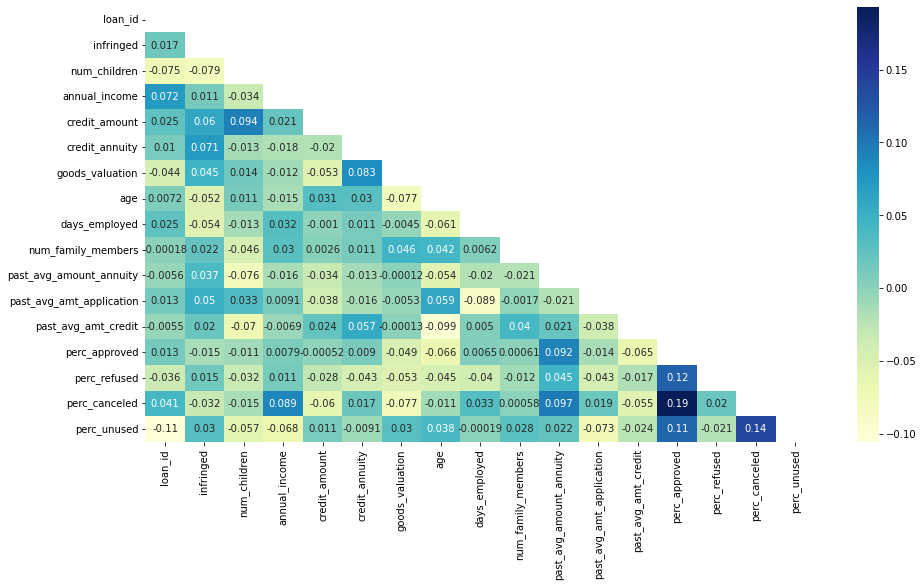

In [284]:
# Correlation map
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(s_data3.corr())) #not to bring mirror results
dataplot = sb.heatmap(s_data3.corr(), cmap="YlGnBu", annot=True, mask=mask) #creating plot
plt.show()

#### Após a sintetização, a maior correlação segue ao redor de 8% em módulo para "infringed", mas no geral, todas as correlações baixaram e aquelas gigantescas (acima de 70% em módulo) desapareceram.

In [286]:
# Números gerais das correlações (DADOS ORIGINAIS)
lista=[]
for i in data3.corr().mean():
    lista.append(i)
print(f'Média "infringed": { round(lista[1]*100,2)}%')
print(f'Média geral: {round(data3.corr().mean().mean()*100,2)}%')
print(f'Desvpad geral: {round(data3.corr().mean().std()*100,2)}%')

Média "infringed": 3.65%
Média geral: 6.94%
Desvpad geral: 6.41%


In [285]:
# Números gerais das correlações (DADOS SINTÉTICOS)
s_lista=[]
for i in s_data3.corr().mean():
    s_lista.append(i)
print(f'Média "infringed": { round(s_lista[1]*100,2)}%')
print(f'Média geral: {round(s_data3.corr().mean().mean()*100,2)}%')
print(f'Desvpad geral: {round(s_data3.corr().mean().std()*100,2)}%')

Média "infringed": 6.75%
Média geral: 5.85%
Desvpad geral: 1.24%


#### A média de infringed pode até ter aumentado, mas no geral há menos correlação (no tamanho, a média) e todos mais próximos de zero (menos dispersão).

### Análise de regressão linear múltipla

In [288]:
# Novos vetores X e Y
s_X = s_data3[['num_children','annual_income','credit_amount','credit_annuity','goods_valuation','age','days_employed',
               'num_family_members','past_avg_amount_annuity','past_avg_amt_application','past_avg_amt_credit',
               'perc_approved','perc_refused','perc_canceled','perc_unused']]
s_y = s_data3['infringed']

In [289]:
# Objeto regressor
reg = LinearRegression()
reg.fit(s_X, s_y)

# Intercepto e constante
s_cte = sm.add_constant(s_X)
s_est = sm.OLS(s_y, s_cte)
s_est2 = s_est.fit()

# Resultadoss
print(s_est2.summary())

                            OLS Regression Results                            
Dep. Variable:              infringed   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.047
Date:                Mon, 05 Dec 2022   Prob (F-statistic):              0.404
Time:                        16:12:49   Log-Likelihood:                -124.47
No. Observations:                 500   AIC:                             280.9
Df Residuals:                     484   BIC:                             348.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

#### Após sintetizar os dados, a maior parte das variáveis ficaram estatisticamente irrelavantes para explicar "infringed", haja vista os valores da estatísticas t, que estão distaantes de zero. A variável mais relevante é const, pois tem o menor t-value, enquanto que as menos relevantes são "num_children", "credit_amount" e "credit_annuity".
#### Além disso, os valores dos coeficientes baixaram todos de valor, o que indica que, havendo algum impacto, ele é menor do que antes. Agora, os que mais impacto (ainda que com menos relevância) são:
- perc_unused: uma nova parcela unsed, aumenta o risco em 6,76% (o que é contraditório)
- intercepto (outras variáveis que não estão aqui)
- num_children: uma nova criança baixa o risco em 3,27% (o que é contraditório porque há menos renda disponível)

### **B.3) Análise de dados (variáveis qualitativas)**

In [291]:
s_data.columns

Index(['loan_id', 'infringed', 'contract_type', 'gender', 'has_own_car',
       'has_own_realty', 'num_children', 'annual_income', 'credit_amount',
       'credit_annuity', 'goods_valuation', 'income_type', 'education',
       'family_status', 'housing_type', 'age', 'days_employed', 'car_age',
       'occupation_type', 'num_family_members', 'region_rating',
       'organization_type', 'score_ext_1', 'score_ext_2', 'score_ext_3',
       'num_req_bureau_hour', 'num_req_bureau_day', 'num_req_bureau_week',
       'num_req_bureau_month', 'num_req_bureau_qrt', 'num_req_bureau_year',
       'past_avg_amount_annuity', 'past_avg_amt_application',
       'past_avg_amt_credit', 'past_loans_approved', 'past_loans_refused',
       'past_loans_canceled', 'past_loans_unused', 'past_loans_total'],
      dtype='object')

In [296]:
s_data['income_type']

0      Commercial associate
1                   Working
2                   Working
3                   Working
4                   Working
               ...         
495                 Working
496    Commercial associate
497                 Working
498           State servant
499                 Working
Name: income_type, Length: 500, dtype: object

In [337]:
# Criando pequenas tabelas dinâmicas, uma para cada variável
s_data6=s_data[['gender','infringed']]
s_data6['group']='gender'
s_multi6 = s_data6.set_index(['group', 'gender'])

s_data7=s_data[['has_own_car','infringed']]
s_data7['group']='has_own_car'
s_multi7 = s_data7.set_index(['group', 'has_own_car'])

s_data8=s_data[['has_own_realty','infringed']]
s_data8['group']='has_own_realty'
s_multi8 = s_data8.set_index(['group', 'has_own_realty'])

s_data9=s_data[['contract_type','infringed']]
s_data9['group']='contract_type'
s_multi9 = s_data9.set_index(['group', 'contract_type'])

s_data10=s_data[['income_type','infringed']]
s_data10['group']='income_type'
s_multi10 = s_data10.set_index(['group', 'income_type'])

s_data11=s_data[['education','infringed']]
s_data11['group']='education'
s_multi11 = s_data11.set_index(['group', 'education'])

s_data12=s_data[['family_status','infringed']]
s_data12['group']='family_status'
s_multi12 = s_data12.set_index(['group', 'family_status'])

s_data13=s_data[['housing_type','infringed']]
s_data13['group']='housing_type'
s_multi13 = s_data13.set_index(['group', 'housing_type'])

s_data14=s_data[['occupation_type','infringed']]
s_data14['group']='occupation_type'
s_multi14 = s_data14.set_index(['group', 'occupation_type'])

s_data15=s_data[['organization_type','infringed']]
s_data15['group']='organization_type'
s_multi15 = s_data15.set_index(['group', 'organization_type'])

### Participação percentual de cada valor de cada variável sobre "infringed"

In [361]:
# Criando subtópico (sob a forma de índice) para juntar todas as análises em uma única tabela
s_data6_1=(s_data6.groupby(['group','gender']).sum()/s_data6.groupby(['group','gender']).count())
s_data6_1.sort_values(by='infringed', ascending = False)

s_data7_1=(s_data7.groupby(['group','has_own_car']).sum()/s_data7.groupby(['group','has_own_car']).count())
s_data7_1.sort_values(by='infringed', ascending = False)

s_data8_1=(s_data8.groupby(['group','has_own_realty']).sum()/s_data8.groupby(['group','has_own_realty']).count())
s_data8_1.sort_values(by='infringed', ascending = False)

s_data9_1=(s_data9.groupby(['group','contract_type']).sum()/s_data9.groupby(['group','contract_type']).count())
s_data9_1.sort_values(by='infringed', ascending = False)

s_data10_1=s_data10.groupby(['group','income_type']).sum()/s_data10.groupby(['group','income_type']).count()
s_data10_1.sort_values(by='infringed', ascending = False)

s_data11_1=s_data11.groupby(['group','education']).sum()/s_data11.groupby(['group','education']).count()
s_data11_1.sort_values(by='infringed', ascending = False)

s_data12_1=multi.groupby(['group','family_status']).sum()/multi.groupby(['group','family_status']).count()
s_data12_1.sort_values(by='infringed', ascending = False)

s_data13_1=s_data13.groupby(['group','housing_type']).sum()/s_data13.groupby(['group','housing_type']).count()
s_data13_1.sort_values(by='infringed', ascending = False)

s_data14_1=s_data14.groupby(['group','occupation_type']).sum()/s_data14.groupby(['group','occupation_type']).count()
s_data14_1.sort_values(by='infringed', ascending = False)

s_data15_1=s_data15.groupby(['group','organization_type']).sum()/s_data15.groupby(['group','organization_type']).count()
s_data15_1.sort_values(by='infringed', ascending = False)

s_ind = s_data15[s_data15['organization_type'].str.contains('Industry', na = False)]
s_trd = s_data15[s_data15['organization_type'].str.contains('Trade', na = False)]
s_bus = s_data15[s_data15['organization_type'].str.contains('Business Entity', na = False)]

s_ind['organization_type'] = 'Industry'
s_trd['organization_type'] = 'Trade'
s_bus['organization_type'] = 'Business Ent'

s_ind_1 = s_ind.groupby(['group','organization_type']).sum()/ind.groupby(['group','organization_type']).count()
s_ind_1.sort_values(by='infringed', ascending = False)

s_trd_1 = s_trd.groupby(['group','organization_type']).sum()/trd.groupby(['group','organization_type']).count()
s_trd_1.sort_values(by='infringed', ascending = False)

s_bus_1 = s_bus.groupby(['group','organization_type']).sum()/bus.groupby(['group','organization_type']).count()
s_bus_1.sort_values(by='infringed', ascending = False)

s_xxx = pd.concat([s_data6_1,s_data7_1,s_data8_1,s_data9_1,s_data10_1,s_data11_1,s_data12_1,s_data13_1,s_data14_1,s_ind_1,s_bus_1,s_trd_1])
s_xxx.sort_values(by=['group','infringed'], ascending = False)

infringed
group             gender                                  
organization_type Trade                           0.148148
                  Business Ent                    0.094675
                  Industry                        0.066667
occupation_type   Waiters/barmen staff            0.428571
                  Low-skill Laborers              0.333333
                  Realty agents                   0.333333
                  Private service staff           0.250000
                  Core staff                      0.162162
                  Managers                        0.112676
                  High skill tech staff           0.111111
                  Drivers                         0.103448
                  Cleaning staff                  0.100000
                  Laborers                        0.092784
                  Sales staff                     0.086957
                  Security staff                  0.083333
                  Accountants                     0.071429
                  Cooking staff                   0.000000
                  HR staff                        0.000000
                  IT staff                        0.000000
                  Medicine staff                  0.000000
                  Secretaries                     0.000000
income_type       Commercial associate            0.115108
                  Working                         0.111111
                  State servant                   0.108696
housing_type      Co-op apartment                 0.250000
                  Rented apartment                0.153846
                  Office apartment                0.117647
                  House / apartment               0.113801
                  With parents                    0.073171
                  Municipal apartment             0.000000
has_own_realty    N                               0.141791
                  Y                               0.101093
has_own_car       Y                               0.112000
gender            M                               0.122977
                  F                               0.094241
family_status     Civil marriage                  0.099446
                  Single / not married            0.098077
                  Separated                       0.081942
                  Married                         0.075599
                  Widow                           0.058242
                  Unknown                         0.000000
education         Secondary / secondary special   0.117647
                  Higher education                0.115880
                  Incomplete higher               0.055556
                  Academic degree                 0.000000
                  Lower secondary                 0.000000
contract_type     Revolving loans                 0.125000
                  Cash loans                      0.110360

#### Agora há um mix de efeitos positivos e negativos, a maior parte deles positivos:
- mulheres com licença maternidade e desempregados não apareceram na base, como se houvesse uma camada extra de privacidade
- pessoas com bens próprios agora são mais arriscados, o que é estranho, mas ajuda na confusão diante de um atacante
- pessoas com ensino superior têm 11,5% de calote, o que vai contra a hipótese de maior educação, menor risco (mas plausível sob a ótica de empréstimos estudantis)

#### Homens continuam gerando mais calores que mulheres, agora a 14%.

#### Dos efeito negativos, há mais profissões gerando risco de calote:
- garçons/barmens: 42,85%
- trabalhores low skill: 33,33%
- corretores de imóveis: 33,33%
- staff privado: 25%
- comércio em geral: 14,81%
- gerentes: 11,26%
- trabalhadores high skill: 11,11%
- motoristas: 10,34%
#### Há aqui uma confusão pois gerentes e trabalhadores high skill teoricamente têm mais renda e isso deveria baixar o risco de calote. Com muito mais funções, maior a dificuldade de um atacante conseguir identificar uma pessoa.

#### Por tipo de habitação:
- pessoas que dividem apartamento: 25%
- pessoas que alugam casas: 15,36%

## **PARTE C) Comparação dados reais VS. sintéticos**

### Correlações

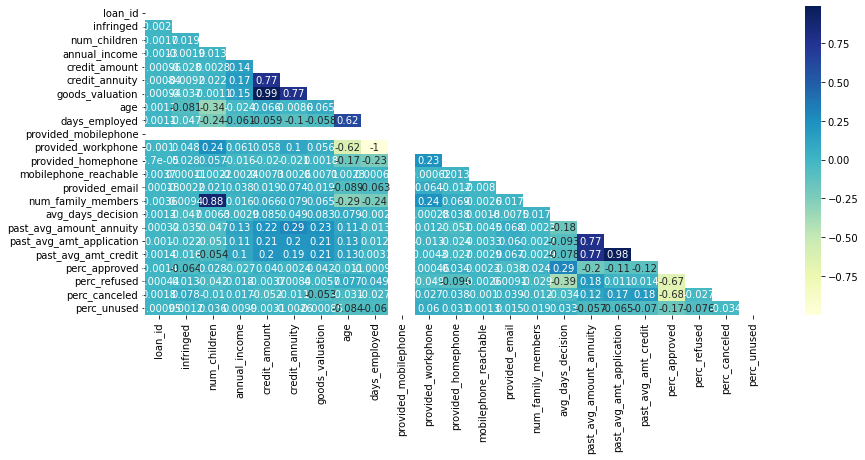

In [317]:
# Correlation map
fig, axs = plt.subplots(figsize=(13, 6.5), tight_layout=True)

mask = np.triu(np.ones_like(data3.corr()))
dataplot = sb.heatmap(data3.corr(), cmap="YlGnBu", annot=True, mask=mask)

plt.show()

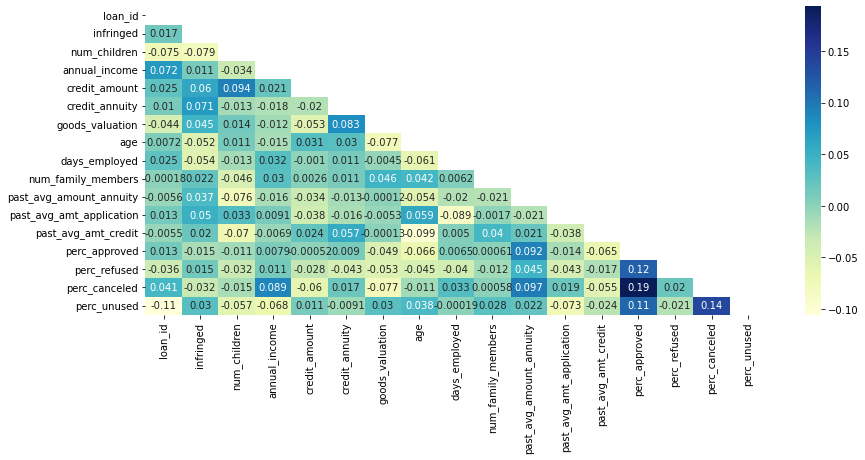

In [315]:
fig, axs = plt.subplots(figsize=(13, 6.5), tight_layout=True)

mask = np.triu(np.ones_like(s_data3.corr()))
dataplot = sb.heatmap(s_data3.corr(), cmap="YlGnBu", annot=True, mask=mask)

plt.show()

### Regressões lineares

In [320]:
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              infringed   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     340.8
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        09:25:54   Log-Likelihood:                -33237.
No. Observations:              290361   AIC:                         6.651e+04
Df Residuals:                  290341   BIC:                         6.673e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
num_children            

In [325]:
print(s_est2.summary())

                            OLS Regression Results                            
Dep. Variable:              infringed   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.047
Date:                Tue, 06 Dec 2022   Prob (F-statistic):              0.404
Time:                        09:26:28   Log-Likelihood:                -124.47
No. Observations:                 500   AIC:                             280.9
Df Residuals:                     484   BIC:                             348.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Variáveis qualitativas

In [397]:
# Unindo as tabelas antes e depois
merge_6 = pd.merge(data6_1, s_data6_1, how='left', on=['group','gender'])
merge_7 = pd.merge(data7_1, s_data7_1, how='left', on=['group','has_own_car'])
merge_8 = pd.merge(data8_1, s_data8_1, how='left', on=['group','has_own_realty'])
merge_9 = pd.merge(data9_1, s_data9_1, how='left', on=['group','contract_type'])
merge_10 = pd.merge(data10_1, s_data10_1, how='left', on=['group','income_type'])
merge_11 = pd.merge(data11_1, s_data11_1, how='left', on=['group','education'])
merge_12 = pd.merge(data12_1, s_data12_1, how='left', on=['group','family_status'])
merge_13 = pd.merge(data13_1, s_data13_1, how='left', on=['group','housing_type'])
merge_14 = pd.merge(data14_1, s_data14_1, how='left', on=['group','occupation_type'])
merge_ind = pd.merge(ind_1, s_ind_1, how='left', on=['group','organization_type'])
merge_trd = pd.merge(trd_1, s_trd_1, how='left', on=['group','organization_type'])
merge_bus = pd.merge(bus_1, s_bus_1, how='left', on=['group','organization_type'])

In [376]:
# Juntando informações
final = pd.concat([merge_6,merge_7,merge_8,merge_9,merge_10,merge_11,merge_12,merge_13,merge_14,merge_ind,merge_trd,merge_bus])
final.sort_values(by=['group','infringed_x'], ascending = False)

infringed_x  infringed_y
group             gender                                                 
organization_type Trade                             0.148148     0.148148
                  Business Ent                      0.094675     0.094675
                  Industry                          0.066667     0.066667
occupation_type   Low-skill Laborers                0.171524     0.333333
                  Drivers                           0.113261     0.103448
                  Waiters/barmen staff              0.112760     0.428571
                  Security staff                    0.107424     0.083333
                  Laborers                          0.105788     0.092784
                  Cooking staff                     0.104440     0.000000
                  Sales staff                       0.096318     0.086957
                  Cleaning staff                    0.096067     0.100000
                  Realty agents                     0.078562     0.333333
                  Secretaries                       0.070498     0.000000
                  Medicine staff                    0.067002     0.000000
                  Private service staff             0.065988     0.250000
                  IT staff                          0.064639     0.000000
                  HR staff                          0.063943     0.000000
                  Core staff                        0.063040     0.162162
                  Managers                          0.062140     0.112676
                  High skill tech staff             0.061599     0.111111
                  Accountants                       0.048303     0.071429
income_type       Maternity leave                   0.400000          NaN
                  Unemployed                        0.363636          NaN
                  Working                           0.095885     0.111111
                  Commercial associate              0.074843     0.115108
                  State servant                     0.057550     0.108696
                  Pensioner                         0.053864          NaN
                  Businessman                       0.000000          NaN
                  Student                           0.000000          NaN
housing_type      Rented apartment                  0.123131     0.153846
                  With parents                      0.116981     0.073171
                  Municipal apartment               0.085397     0.000000
                  Co-op apartment                   0.079323     0.250000
                  House / apartment                 0.077957     0.113801
                  Office apartment                  0.065724     0.117647
has_own_realty    N                                 0.083249     0.141791
                  Y                                 0.079616     0.101093
has_own_car       N                                 0.085002          NaN
                  Y                                 0.072437     0.112000
gender            M                                 0.101419     0.122977
                  F                                 0.069993     0.094241
                  XNA                               0.000000          NaN
family_status     Civil marriage                    0.099446     0.099446
                  Single / not married              0.098077     0.098077
                  Separated                         0.081942     0.081942
                  Married                           0.075599     0.075599
                  Widow                             0.058242     0.058242
                  Unknown                           0.000000     0.000000
education         Lower secondary                   0.109277     0.000000
                  Secondary / secondary special     0.089399     0.117647
                  Incomplete higher                 0.084850     0.055556
                  Higher education                  0.053551     0.115880
                  Academic degree                   0

In [394]:
# Variação depois VS. antes
final.infringed_y/final.infringed_x

group              gender                       
gender             F                                1.346427
                   M                                1.212565
                   XNA                                   NaN
has_own_car        N                                     NaN
                   Y                                1.546165
has_own_realty     N                                1.703210
                   Y                                1.269760
contract_type      Cash loans                       1.322328
                   Revolving loans                  2.281718
income_type        Businessman                           NaN
                   Commercial associate             1.538001
                   Maternity leave                       NaN
                   Pensioner                             NaN
                   State servant                    1.888728
                   Student                               NaN
                   Unemployed       

In [396]:
# Ordenando os valores das variáveis que mais ganharam privacidade (das que explicam menos às que explicam mais "infringed")
((final.infringed_y/final.infringed_x-1)*100).sort_values()

group              gender                       
occupation_type    Cooking staff                   -100.000000
                   IT staff                        -100.000000
education          Lower secondary                 -100.000000
                   Academic degree                 -100.000000
occupation_type    HR staff                        -100.000000
                   Secretaries                     -100.000000
                   Medicine staff                  -100.000000
housing_type       Municipal apartment             -100.000000
                   With parents                     -37.450826
education          Incomplete higher                -34.524720
occupation_type    Security staff                   -22.426131
                   Laborers                         -12.292728
                   Sales staff                       -9.719332
                   Drivers                           -8.664059
family_status      Widow                              0.000000
organi